# Paramétrage de l'environnement de travail et import des packages

In [1]:
%cd "C:\Users\user\Desktop\data_science_documents\data_science_projets_perso\projet_housing_prediction\housing-prediction"

C:\Users\user\Desktop\data_science_documents\data_science_projets_perso\projet_housing_prediction\housing-prediction


In [2]:
from pathlib import Path

%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

ROOT = Path().resolve()
sys.path.append(str(ROOT / "03_src"))

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cheat_tools.data_manipulation import missing_percentage
from cheat_tools.data_visualization import plot_countplots_bivarie_grid, plot_boxplots_grid, plot_countplots_grid,afficher_heatmap_correlation, smart_countplot, plot_kde_multivariables_grid
from cheat_tools.stat_tests import analyser_dependance_khi2, analyser_dependance_mannwhitney
from cheat_tools.cartography import carte_interactive


In [4]:
chemin_repo = Path(r"C:\Users\user\Desktop\data_science_documents\data_science_projets_perso\projet_housing_prediction\housing-prediction")


# Global

**Informations globales sur le jeu de données**

In [5]:
data_housing = pd.read_csv(f"{chemin_repo}/01_data/02_processed/02_eda/housing_data_eda_processed.csv",
                           dtype={'id_annonce':"object"})


In [6]:
data_housing.head()

id_annonce code_insee  approximate_latitude  approximate_longitude   size  \
0      11541      01263             46.083952               4.762737  117.0   
1      09207      06004             43.587061               7.115609  185.0   
2      15840      76351             49.500023               0.137997   64.0   
3      03543      34147             43.470415               3.217742  107.0   
4      34900      24055             45.318143               0.600697  266.0   

   nb_rooms  nb_photos  population  nb_menages_fiscaux  revenu_median  ...  \
0       4.0        8.0      3792.0              1651.0        25970.0  ...   
1       3.0        6.0     75130.0             40649.0        24410.0  ...   
2       3.0        6.0    166058.0             77021.0        20180.0  ...   
3       5.0       10.0      3478.0              1422.0        21650.0  ...   
4       9.0        8.0       780.0               304.0        20560.0  ...   

   nb_lits_tourisme  densite_services_rayon  type_rural_urbain  \
0               0.0                    12.0             Urbain   
1            2958.0                   223.0             Urbain   
2            1719.0                   189.0             Urbain   
3               0.0                    18.0              Rural   
4               0.0                     3.0              Rural   

  position_commune_unite_urbaine property_type        type_degre_densite  \
0                       Banlieue        maison        Ceintures urbaines   
1                       Banlieue   appartement    Grands centres urbains   
2                         Centre   appartement    Grands centres urbains   
3                         Centre        maison             Bourgs ruraux   
4             Hors unité urbaine        maison  Rural à habitat dispersé   

                          type_unite_urbaine taille_pole_et_couronne  \
0         Agglomération inter-départementale  Hors Attraction Villes   
1         Agglomération intra-départementale        Aire 200k - 700k   
2         Agglomération intra-départementale        Aire 200k - 700k   
3         Agglomération intra-départementale         Aire 50k - 200k   
4  Commune hors unité urbaine du département  Hors Attraction Villes   

  taille_agglomeration target  
0        20k - 50k hab      0  
1        200k - 2M hab      0  
2        200k - 2M hab      0  
3          2k - 5k hab      0  
4   Rural / Hors Agglo      0  

[5 rows x 21 columns]

In [7]:
data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26648 entries, 0 to 26647
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_annonce                      26648 non-null  object 
 1   code_insee                      26648 non-null  object 
 2   approximate_latitude            26648 non-null  float64
 3   approximate_longitude           26648 non-null  float64
 4   size                            26479 non-null  float64
 5   nb_rooms                        26505 non-null  float64
 6   nb_photos                       26648 non-null  float64
 7   population                      26446 non-null  float64
 8   nb_menages_fiscaux              26317 non-null  float64
 9   revenu_median                   26317 non-null  float64
 10  nb_actes_delinquants            26422 non-null  float64
 11  nb_lits_tourisme                26422 non-null  float64
 12  densite_services_rayon          

In [8]:
data_housing.describe()

approximate_latitude  approximate_longitude          size  \
count          26648.000000           26648.000000  26479.000000   
mean              46.560064               2.653694    124.804439   
std                2.358976               2.583976     71.485633   
min               41.374436              -4.718490     10.000000   
25%               43.896935               1.198781     72.000000   
50%               46.985218               2.385479    110.000000   
75%               48.844464               4.683312    185.000000   
max               51.046009               9.503198   1600.000000   

           nb_rooms     nb_photos     population  nb_menages_fiscaux  \
count  26505.000000  26648.000000   26446.000000        26317.000000   
mean       4.380117      8.470129   45361.397035        20416.650264   
std        2.212467      4.505669   81953.737109        36761.758055   
min        1.000000      1.000000      14.000000           41.000000   
25%        3.000000      5.000000    2613.000000         1200.000000   
50%        4.000000      8.000000   12096.000000         5562.000000   
75%        5.000000     10.000000   49104.000000        22023.000000   
max       27.000000     50.000000  504078.000000       222023.000000   

       revenu_median  nb_actes_delinquants  nb_lits_tourisme  \
count   26317.000000          26422.000000      26422.000000   
mean    24194.397158           3640.282643        612.029937   
std      5199.124632           7281.805559       1453.082904   
min     13460.000000              0.000000          0.000000   
25%     20970.000000             62.000000          0.000000   
50%     22870.000000            654.000000          0.000000   
75%     25810.000000           3482.000000        557.000000   
max     55340.000000          43378.000000      16734.000000   

       densite_services_rayon       target  
count            26648.000000  26648.00000  
mean               152.181852      0.34618  
std                256.366925      0.47576  
min                  0.000000      0.00000  
25%                 12.000000      0.00000  
50%                 47.000000      0.00000  
75%                164.000000      1.00000  
max               1524.000000      1.00000

In [9]:
missing_percentage(data_housing)

features     0
0                       id_annonce  0.00
1                       code_insee  0.00
2             approximate_latitude  0.00
3            approximate_longitude  0.00
4                             size  0.01
5                         nb_rooms  0.01
6                        nb_photos  0.00
7                       population  0.01
8               nb_menages_fiscaux  0.01
9                    revenu_median  0.01
10            nb_actes_delinquants  0.01
11                nb_lits_tourisme  0.01
12          densite_services_rayon  0.00
13               type_rural_urbain  0.01
14  position_commune_unite_urbaine  0.01
15                   property_type  0.00
16              type_degre_densite  0.01
17              type_unite_urbaine  0.01
18         taille_pole_et_couronne  0.01
19            taille_agglomeration  0.01
20                          target  0.00

# Analyse univariée

**Comptage des modalités pour la variable cible**

<Axes: xlabel='target', ylabel='count'>

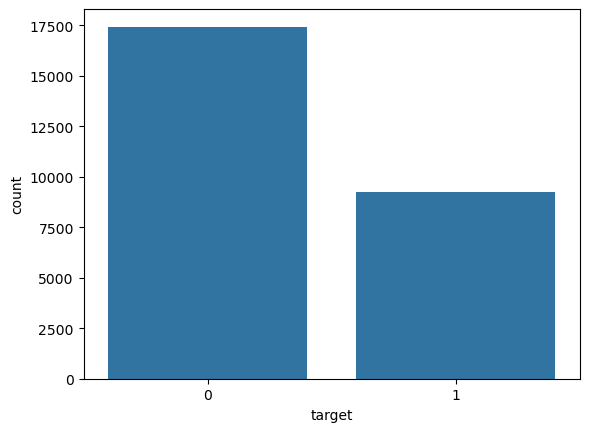

In [10]:
sns.countplot(data_housing,x="target")

**Comptage des modalités pour le type de propriété**

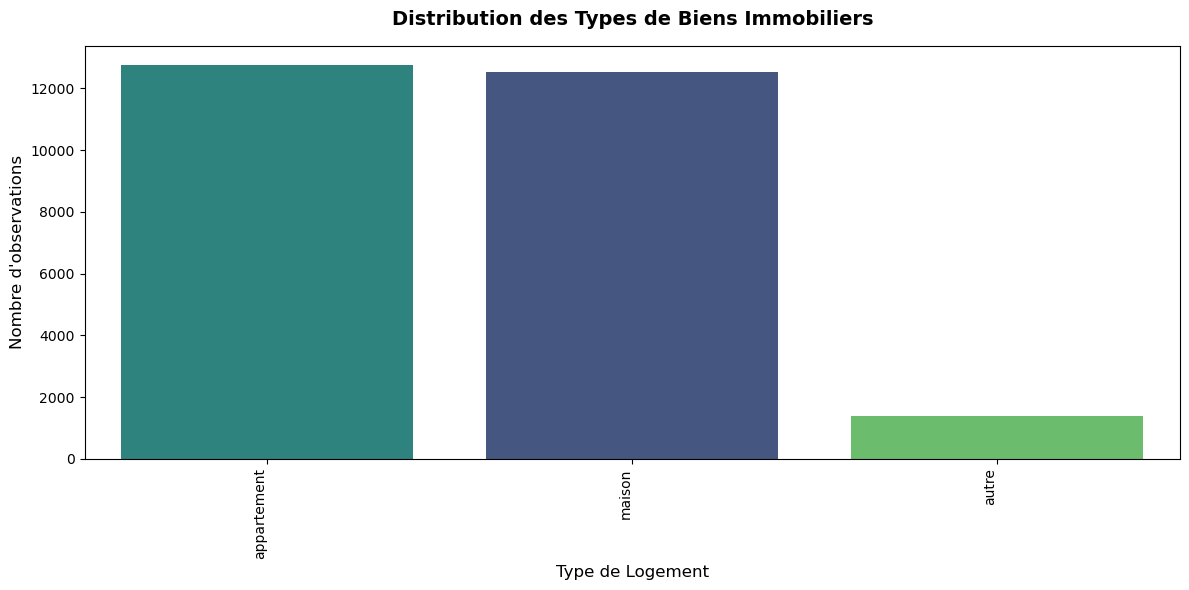

In [11]:
smart_countplot(
    data_housing, 
    "property_type", 
    titre="Distribution des Types de Biens Immobiliers", 
    xlabel="Type de Logement",
    rotation=90
    )

**Comptage des modalités pour les variables catégorielles**

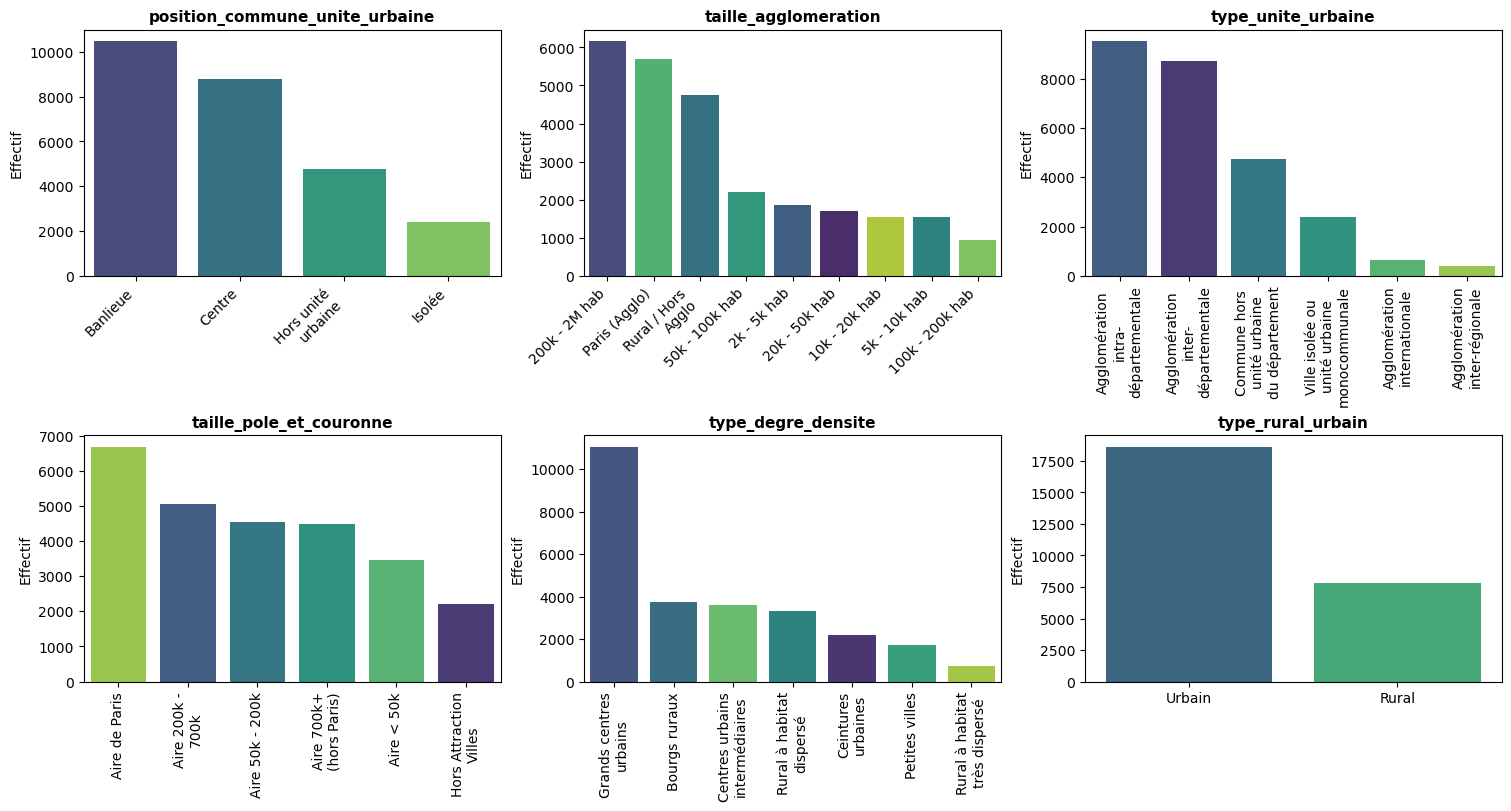

In [14]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","type_degre_densite","type_rural_urbain"]

plot_countplots_grid(
    data_housing,
    variables_interet
)

**Distributions pour les variables continues/ordinales d'interet**

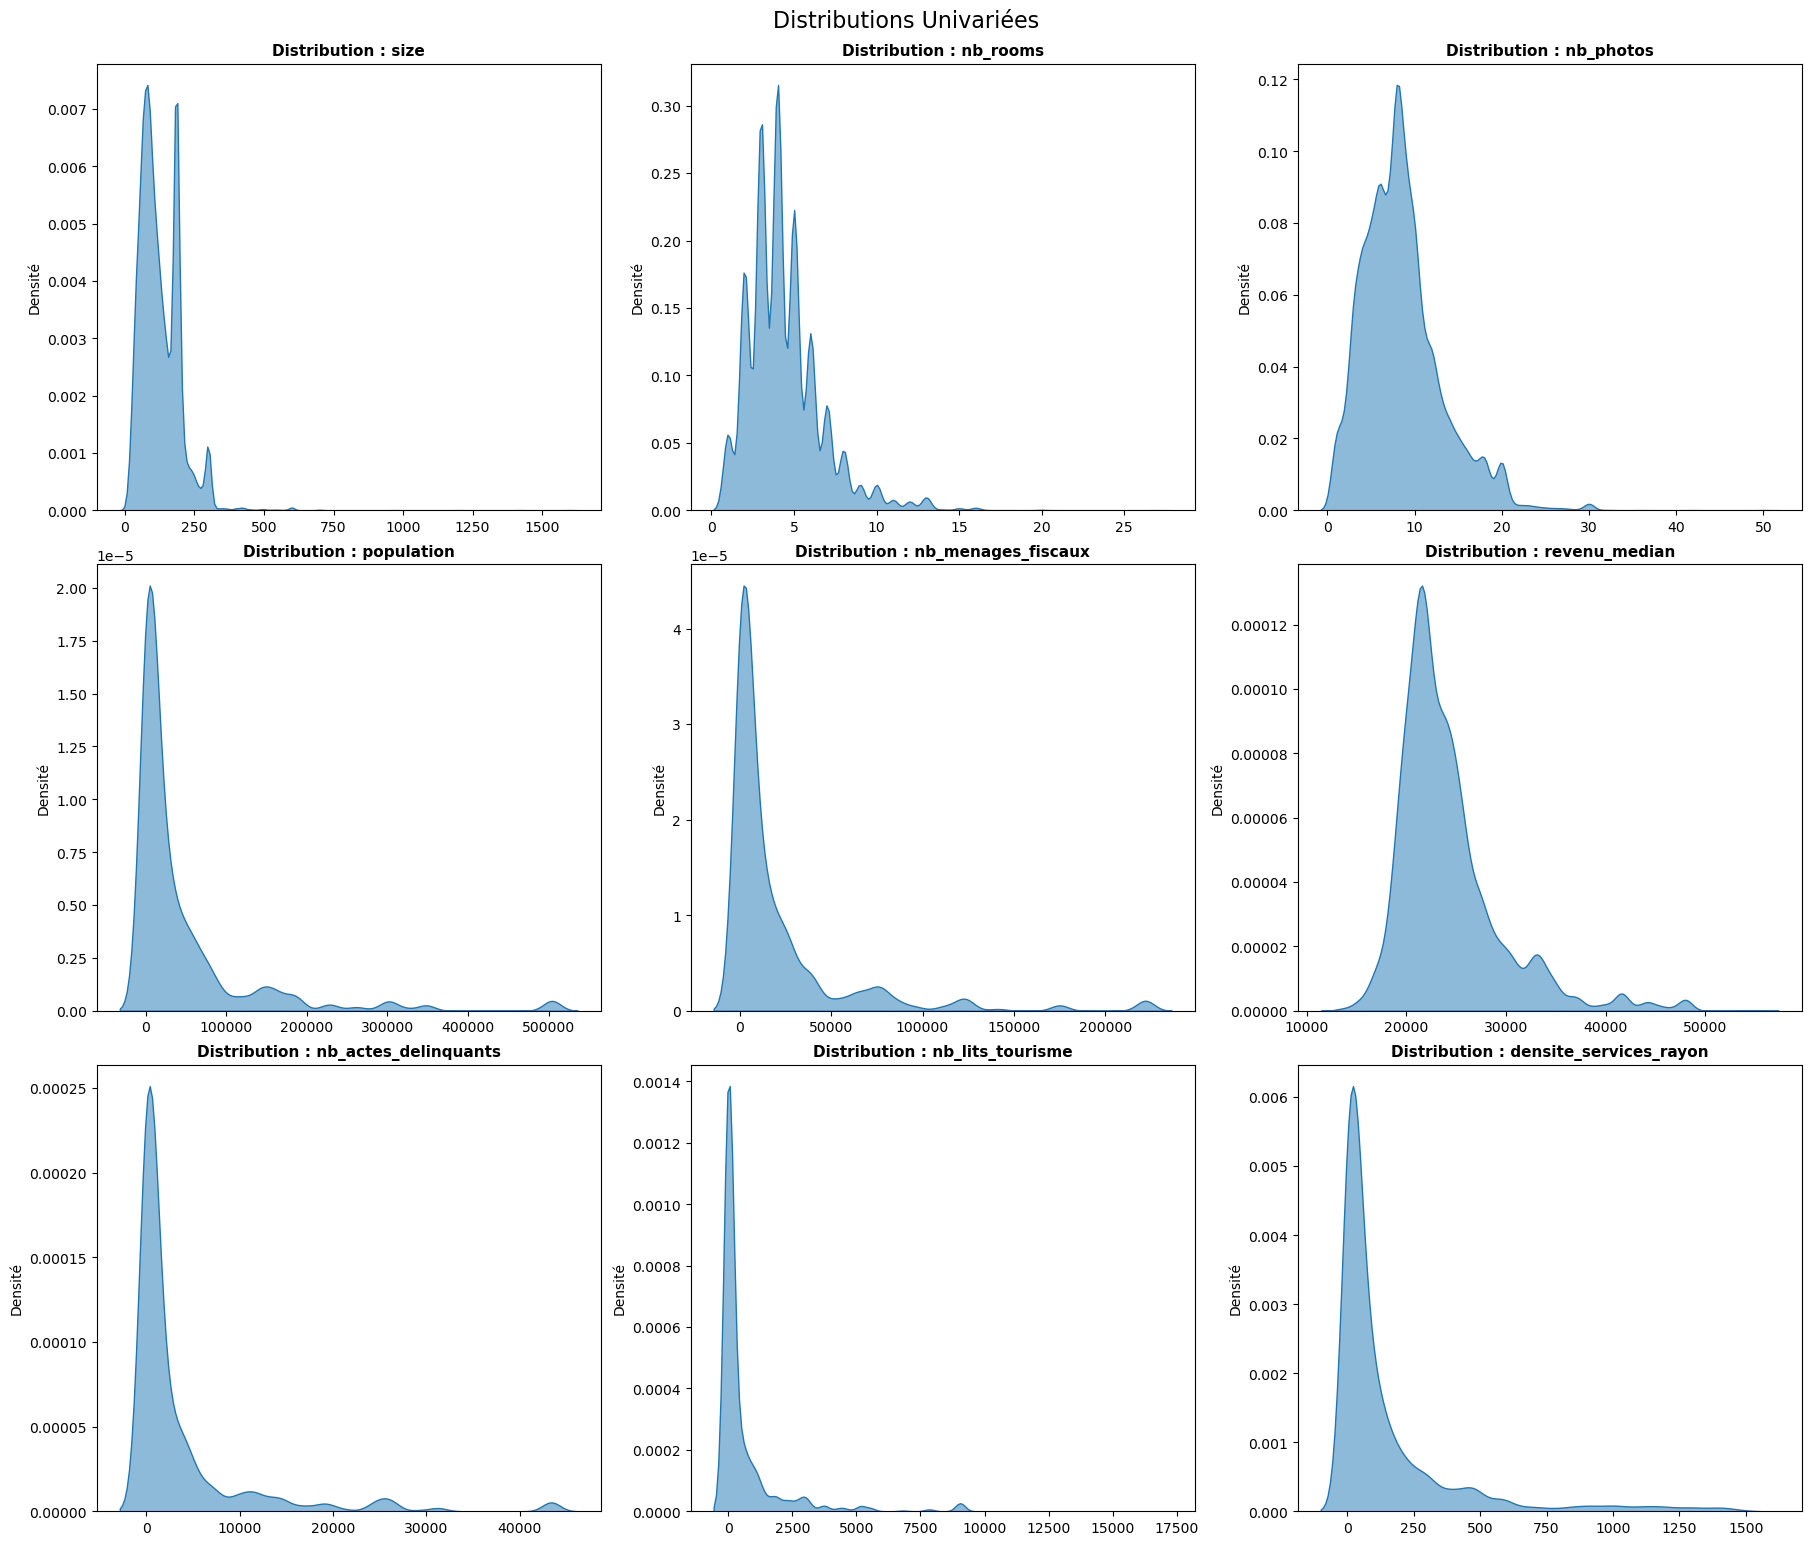

In [16]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

plot_kde_multivariables_grid(
    data_housing,
    variables_interet
)

**Boites à moustaches pour les variables continues/ordinales**

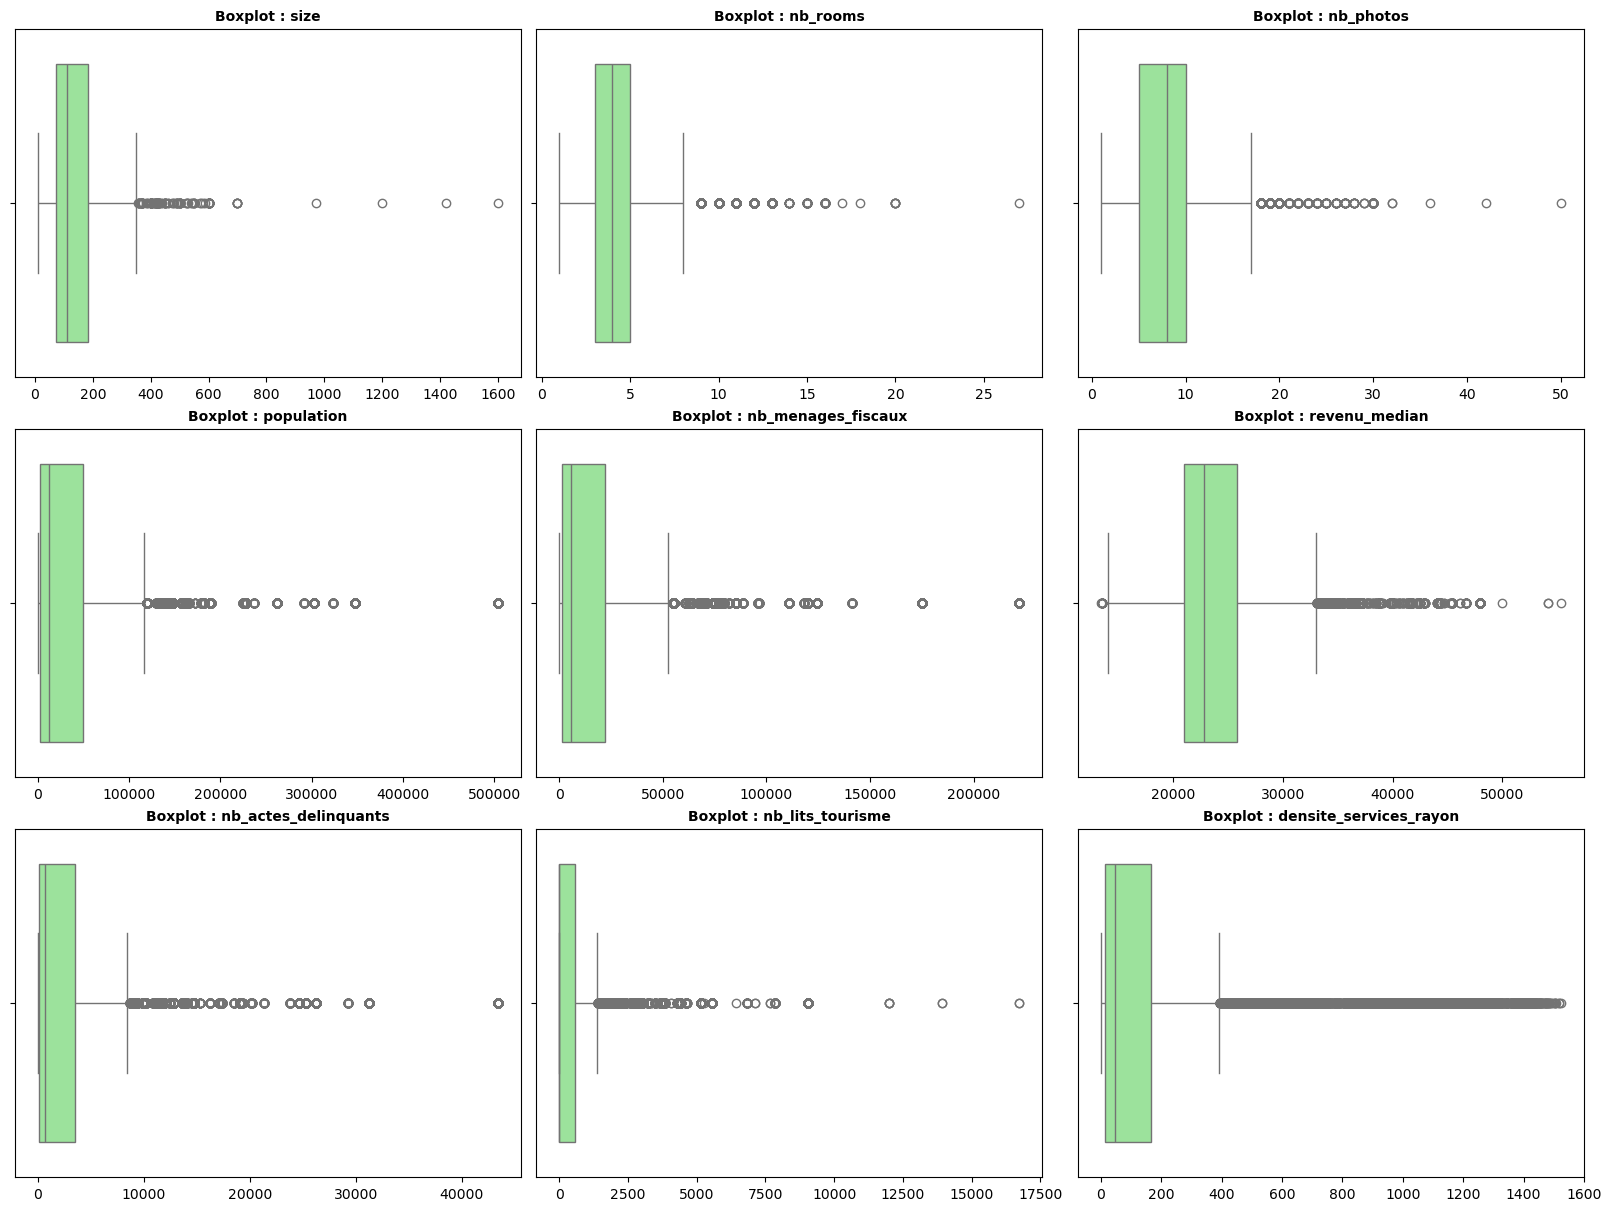

In [17]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

plot_boxplots_grid(
    data_housing,
    variables_interet
)

**Cartographie - Répartition géographique des prix immobiliers**

In [18]:
carte_interactive(
    df = data_housing,
    hue = "target",
    lat_col = "approximate_latitude",
    lon_col = "approximate_longitude",
    variable_info = "target",
    titre = "Répartition géographique des prix immobiliers"
)

⚠️ Dataset volumineux : affichage d'un échantillon de 20000 points.
Variable 'target' convertie en catégories pour l'affichage couleur.


In [19]:
carte_interactive(
    data_housing,
    "property_type",
    "approximate_latitude",
    "approximate_longitude",
    "target",
    "Répartition géographique des types de propriété"
)

⚠️ Dataset volumineux : affichage d'un échantillon de 20000 points.


# Analyse bivariée

**Matrice de corrélation pour les variables d'interet**

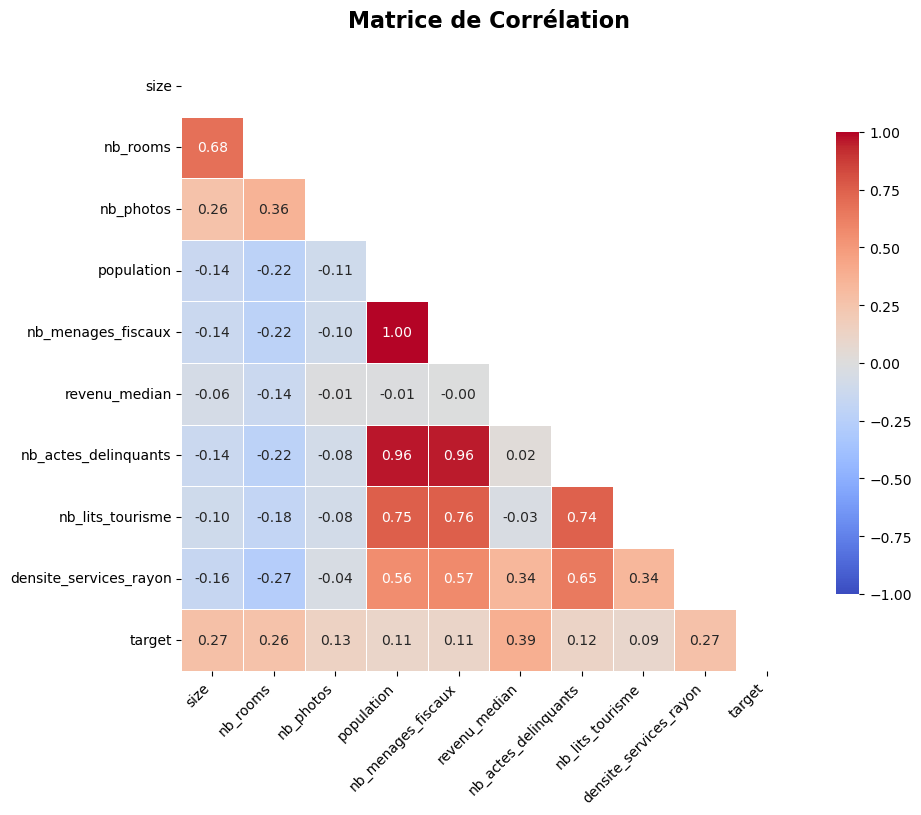

In [20]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon",
                     "target"]

afficher_heatmap_correlation(
    data_housing,
    variables_interet
)

**Analyse de la distribution des variables continues d'interet en fonction de la variable cible**

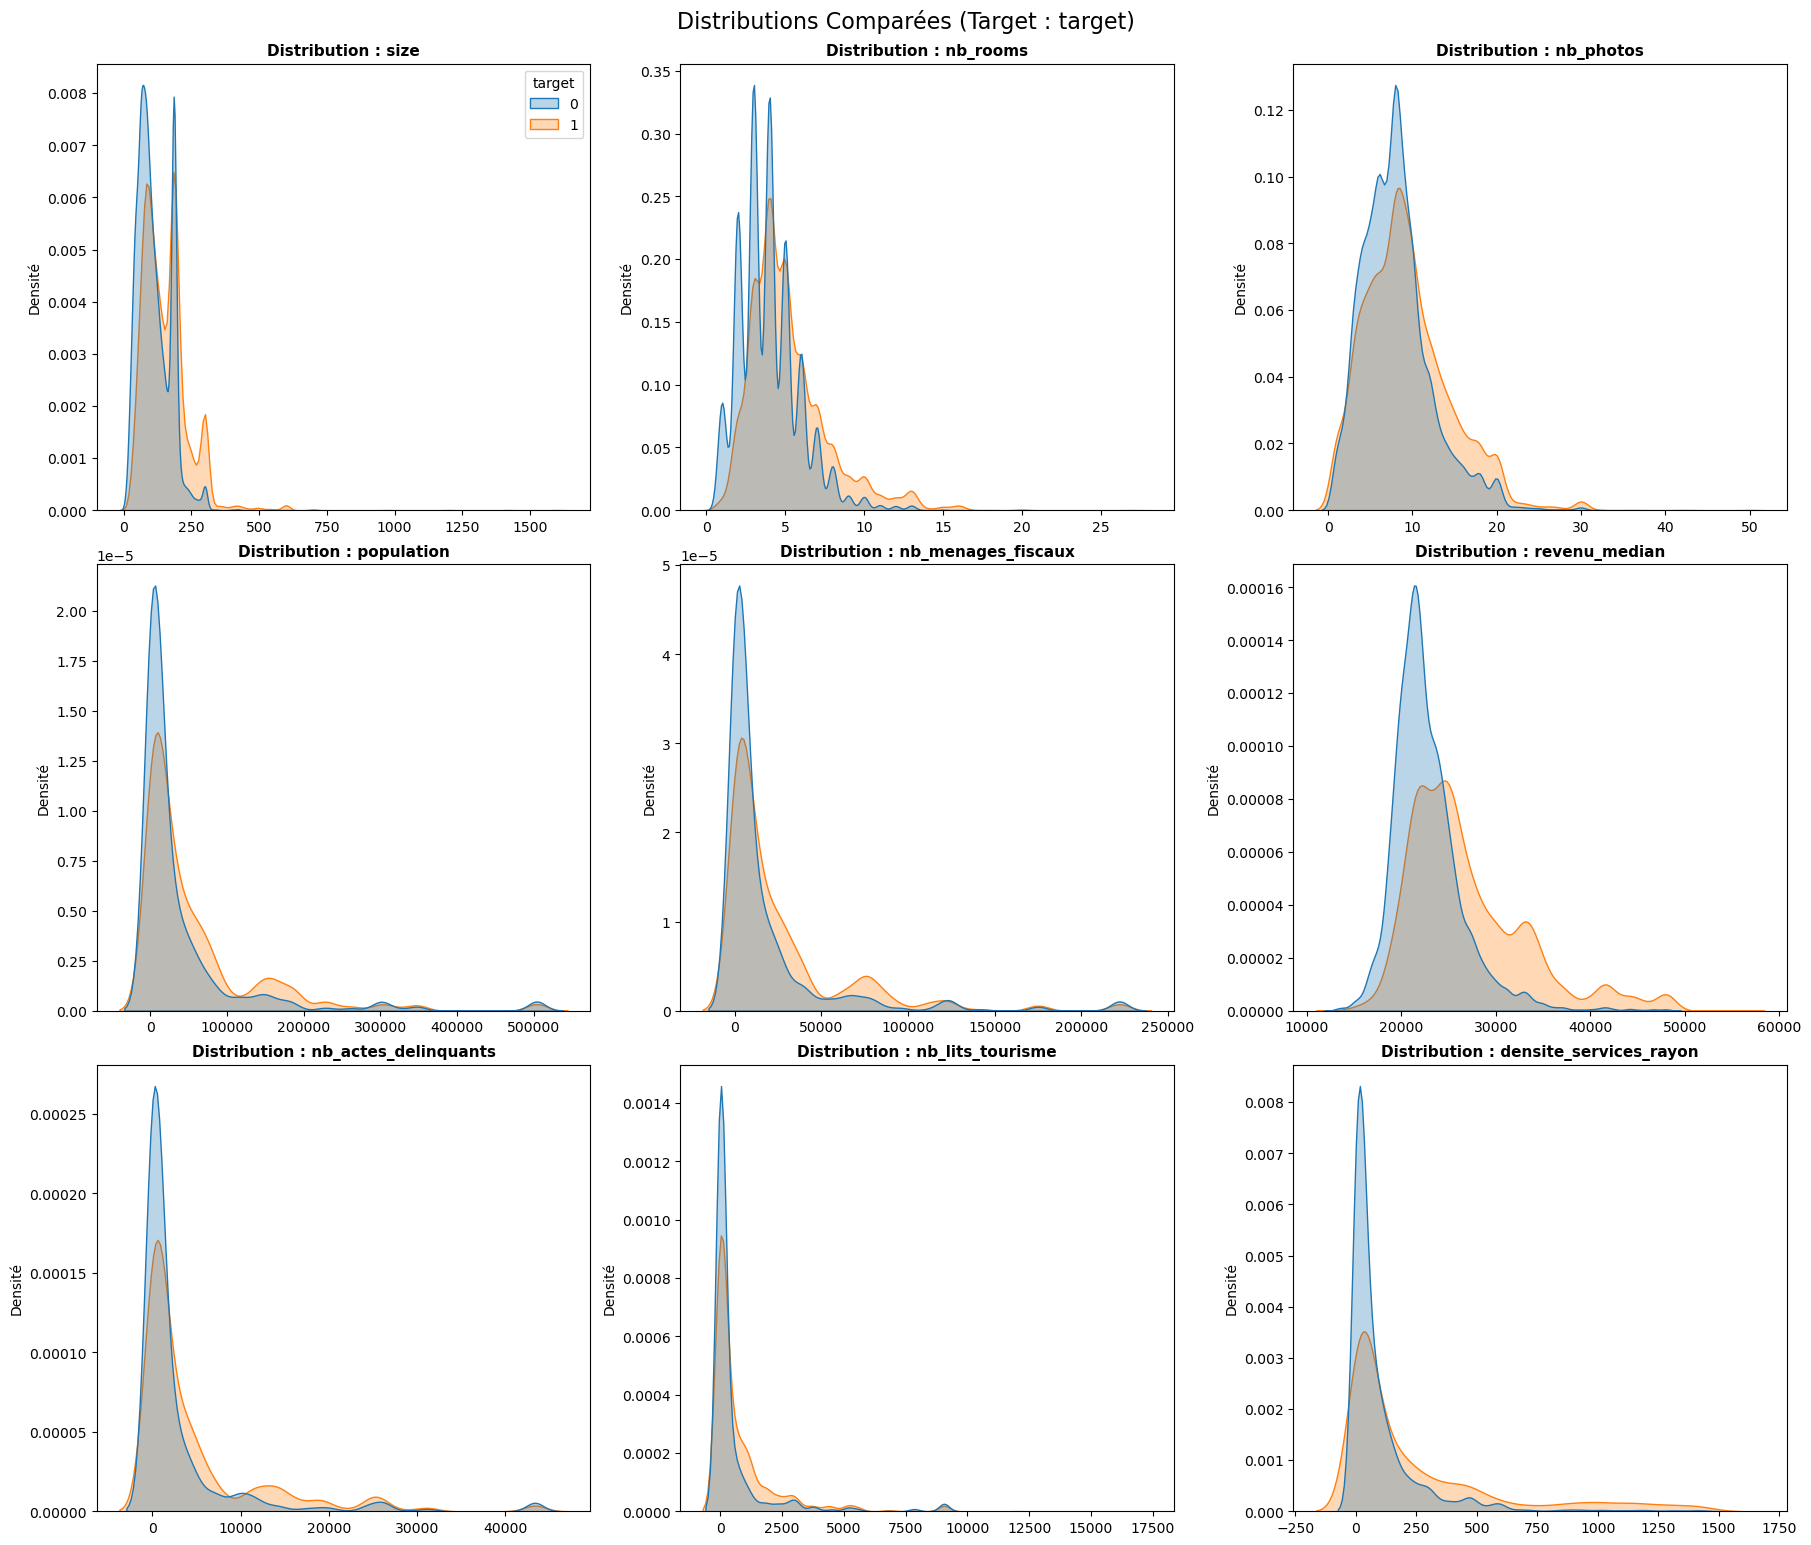

In [21]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

plot_kde_multivariables_grid(
    data_housing,
    variables_interet,
    "target"
)

**Test de Mann-Whitney**

In [22]:
variables_interet = ["size","nb_rooms","nb_photos",
                     "population","nb_menages_fiscaux","revenu_median",
                     "nb_actes_delinquants","nb_lits_tourisme","densite_services_rayon"]

analyser_dependance_mannwhitney(
    data_housing,
    "target",
    variables_interet
)

--- Analyse Mann-Whitney (Target Binaire : 'target') ---
--- Comparaison : Groupe '0' vs Groupe '1' ---


Variable  P-value Différence Significative  Taille Effet (r)  \
0           revenu_median  < 0.001                      OUI            0.4539   
1                    size  < 0.001                      OUI            0.3177   
2                nb_rooms  < 0.001                      OUI            0.2959   
3  densite_services_rayon  < 0.001                      OUI            0.2889   
4    nb_actes_delinquants  < 0.001                      OUI            0.2628   
5      nb_menages_fiscaux  < 0.001                      OUI            0.2560   
6              population  < 0.001                      OUI            0.2558   
7        nb_lits_tourisme  < 0.001                      OUI            0.2148   
8               nb_photos  < 0.001                      OUI            0.1432   

  Direction Effet      U Stat  
0         Positif  42898519.5  
1         Positif  54204306.5  
2         Positif  55972570.0  
3         Positif  57147277.5  
4         Positif  58314555.5  
5         Positif  58446541.0  
6         Positif  58952002.0  
7         Positif  62109150.0  
8         Positif  68854361.5

**Comptage variables catégorielles d'interet en fonction de la variable cible**

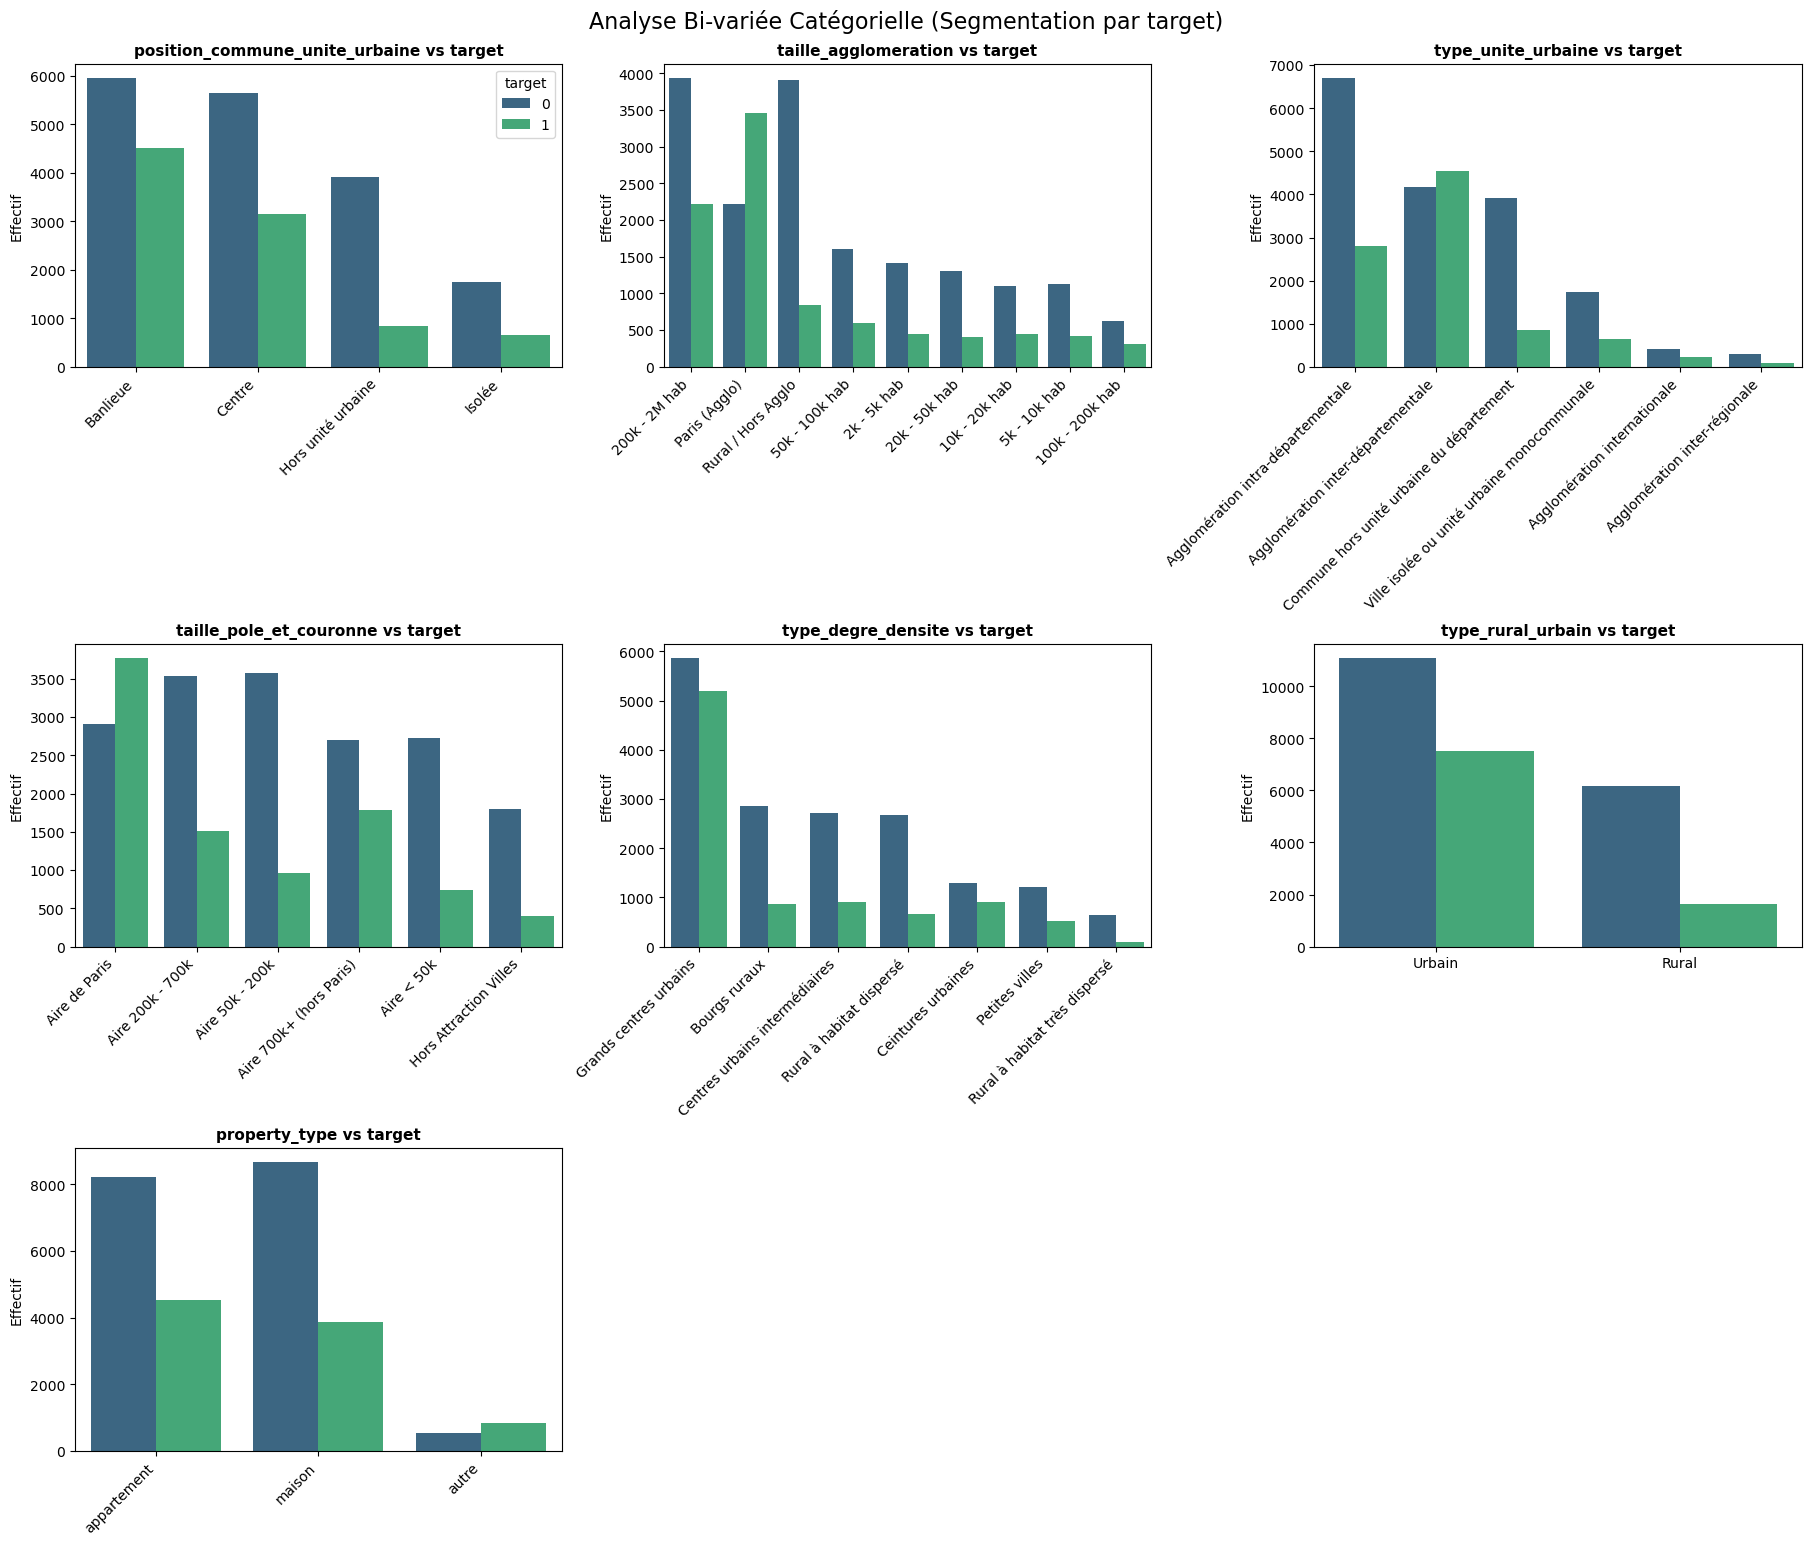

In [25]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","type_degre_densite","type_rural_urbain","property_type"]

plot_countplots_bivarie_grid(
    data_housing,
    "target",
    variables_interet
)

**Test de Khi2**

In [26]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","type_degre_densite","type_rural_urbain","property_type"]

analyser_dependance_khi2(
    data_housing,
    "target",
    variables_interet
    )

--- Analyse de dépendance (Khi-deux) avec la cible : 'target' ---


Variable  P-value Dépendance Significative  \
0            taille_agglomeration  < 0.001                      OUI   
1         taille_pole_et_couronne  < 0.001                      OUI   
2              type_unite_urbaine  < 0.001                      OUI   
3              type_degre_densite  < 0.001                      OUI   
4  position_commune_unite_urbaine  < 0.001                      OUI   
5               type_rural_urbain  < 0.001                      OUI   
6                   property_type  < 0.001                      OUI   

   V de Cramer  Chi2 Stat  
0       0.3154    2627.63  
1       0.3019    2408.98  
2       0.2718    1951.24  
3       0.2476    1619.91  
4       0.1929     983.53  
5       0.1863     916.70  
6       0.1358     491.20